In [20]:
# import libraries
import pandas as pd
import numpy as np
from math import radians, cos, sin, asin, sqrt

In [21]:
# Define Haversine formula
#Inputs are the coordinates of consecutive points,lon1, lat1, lon2, lat2
# Returas the distance between them

def haversine(lon1, lat1, lon2, lat2 ):
    " Calculate the great circle distance in kilometers between two points on the earth (specified in decimal degrees)"
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 =map(radians, [lon1, lat1, lon2, lat2]) 

    # haversine formula
    dlon= lon2-lon1
    dlat= lat2-lat2
    a = sin(dlat/2)**2 + cos(lat2) * cos(lat2) * sin(dlon/2)**2
    c= 2 * asin(sqrt(a))
    r= 6371 # radius of earth in kilometers
    return c * r


In [22]:
#Read data
# This is a Phyphox GPS measurment. Walking short distance outside.

data = pd.read_csv('gps_data.csv')
data.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites
0,0.000000,65.060708,25.466667,18.014785,35.5,NaN,NaN,0.024307,28.594,2.723073,0.0
1,10.824539,65.060914,25.466841,18.514726,36.0,0.56,88.900002,0.044187,36.000,38.000000,15.0
2,11.812389,65.060741,25.466945,25.514804,43.0,0.41,97.199997,0.052543,27.000,33.000000,17.0
3,12.817709,65.060816,25.466944,17.514775,35.0,0.33,97.199997,0.052985,31.500,33.000000,20.0
4,13.822085,65.060820,25.466940,18.514773,36.0,0.53,97.199997,0.056031,25.500,29.000000,22.0


In [29]:
#Derive velocity using haversine (although it is already in the data is most cases)

lat = data['Latitude (°)'] #Latitute
lon = data['Longitude (°)'] #Longitude

data['dist'] = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. we'll calculate the distance between consecutive points there
data['time_diff'] = np.zeros(lat.shape[0]) #Add new column (of zeros) to the data. we'll calculate the time between consecutive points there

for i in range(lat.shape[0]-1): #For-loop gose through the data untill the second last row
  data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1])*1000 #The distance between data points with indices i ja i+1 (in meters)
  data['time_diff'][i] = data['Time (s)'][i+1] - data['Time (s)'][i] #The time step between data points with indices i ja i+1 (in meters)

data['dist'][0] = 0
data['velocity'] = data['dist']/data['time_diff']

#data.tail()
data.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,time_diff,velocity
0,0.000000,65.060708,25.466667,18.014785,35.5,NaN,NaN,0.024307,28.594,2.723073,0.0,0.000000,10.824539,0.000000
1,10.824539,65.060914,25.466841,18.514726,36.0,0.56,88.900002,0.044187,36.000,38.000000,15.0,4.873346,0.987851,4.933282
2,11.812389,65.060741,25.466945,25.514804,43.0,0.41,97.199997,0.052543,27.000,33.000000,17.0,0.051106,1.005319,0.050835
3,12.817709,65.060816,25.466944,17.514775,35.0,0.33,97.199997,0.052985,31.500,33.000000,20.0,0.196921,1.004376,0.196063
4,13.822085,65.060820,25.466940,18.514773,36.0,0.53,97.199997,0.056031,25.500,29.000000,22.0,0.699070,1.003598,0.696563


In [24]:
import folium
location_frame = data[['Latitude (°)','Longitude (°)']]
location_list = location_frame.values.tolist()

ave_lat = np.mean(location_list,axis=0)[0]
ave_lon = np.mean(location_list,axis =0)[1]

my_map = folium.Map(location=[ave_lat,ave_lon], zoom_start=20)

folium.PolyLine(location_list, color="red", weight=2.2, opacity=1).add_to(my_map)
my_map

Text(0, 0.5, 'Number of Satellites')

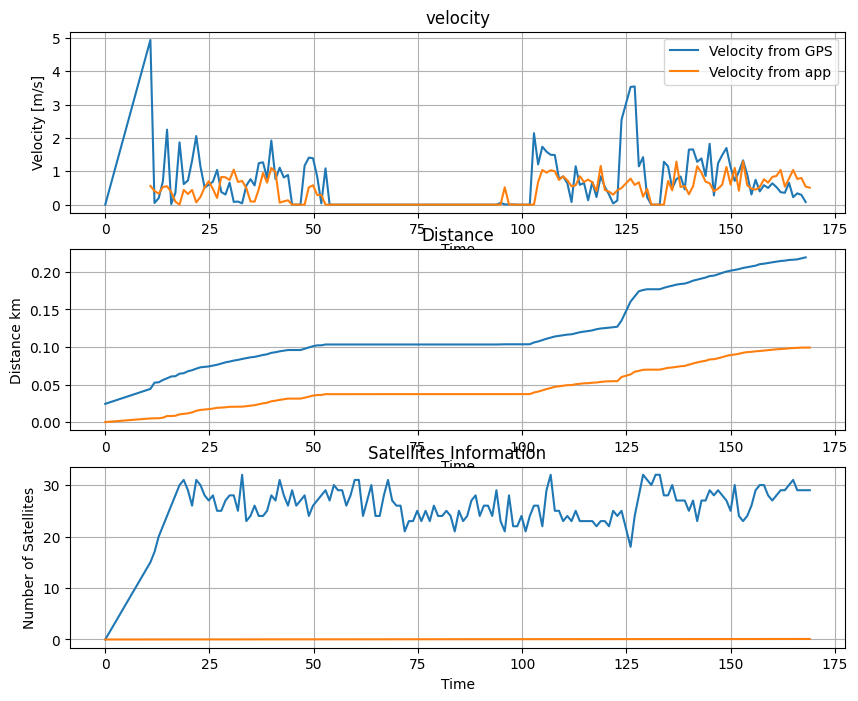

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
plt.plot(data['Time (s)'], data['velocity']) #Velocity is derived from raw GPS signal
plt.plot(data['Time (s)'], data['Speed (m/s)'])  #Speed comes from app
plt.legend(['Velocity from GPS', 'Velocity from app']) 
plt.grid()
plt.title('velocity')
plt.xlabel('Time')
plt.ylabel('Velocity [m/s]')
#plt.axis([0,140,0,8])

plt.subplot(3,1,2) #Second panel, distance
plt.plot(data['Time (s)'],data['Distance (km)']) #Distance from the app
plt.plot(data['Time (s)'],np.cumsum(data['dist'])/1000) #Distance from GPS signal
#plt.legend(['Velocity from GPS', 'Velocity from app'])
plt.grid()
plt.title('Distance')
plt.xlabel('Time')
plt.ylabel('Distance km')
#plt.axis([0,140,0,8])

plt.subplot(3,1,3)
plt.plot(data['Time (s)'],data['Satellites'])
plt.plot(data['Time (s)'],np.cumsum(data['dist'])/1000)
plt.grid()
plt.title('Satellites Information')
plt.xlabel('Time')
plt.ylabel('Number of Satellites')

In [38]:
data.head()

,Time (s),Latitude (°),Longitude (°),Altitude (m),Altitude WGS84 (m),Speed (m/s),Direction (°),Distance (km),Horizontal Accuracy (m),Vertical Accuracy (m),Satellites,dist,time_diff,velocity
0,0.000000,65.060708,25.466667,18.014785,35.5,NaN,NaN,0.024307,28.594,2.723073,0.0,0.000000,10.824539,0.000000
1,10.824539,65.060914,25.466841,18.514726,36.0,0.56,88.900002,0.044187,36.000,38.000000,15.0,4.873346,0.987851,4.933282
2,11.812389,65.060741,25.466945,25.514804,43.0,0.41,97.199997,0.052543,27.000,33.000000,17.0,0.051106,1.005319,0.050835
3,12.817709,65.060816,25.466944,17.514775,35.0,0.33,97.199997,0.052985,31.500,33.000000,20.0,0.196921,1.004376,0.196063
4,13.822085,65.060820,25.466940,18.514773,36.0,0.53,97.199997,0.056031,25.500,29.000000,22.0,0.699070,1.003598,0.696563
